In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
# Option to display all dataframes columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt

housing = pd.read_csv('Ames_HousePrice_cleaned.csv', index_col=0)
housing.shape

(2580, 59)

In [19]:
# Features from the lasso selection
import statsmodels.api as sm 

X=housing[['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtFinSF1', 
'TotalBsmtSF','KitchenAbvGr', 'KitchenQual','Fireplaces', 'GarageArea', 
'ScreenPorch','Class_2story_dev', 'Class_duplex','Lot_CulDSac', 'Foundation_Concrete']]
y=housing.SalePrice

X_add_const = sm.add_constant(X)
ols = sm.OLS(y, X_add_const)
ans = ols.fit()
print(ans.summary())
print(ans.rsquared)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     930.0
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:31:06   Log-Likelihood:                -29956.
No. Observations:                2580   AIC:                         5.995e+04
Df Residuals:                    2560   BIC:                         6.007e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.764e+05   5

### Looking at the VIFs of the features

Text(0.5, 1.0, '$R^2$ of a given feature against all other features')

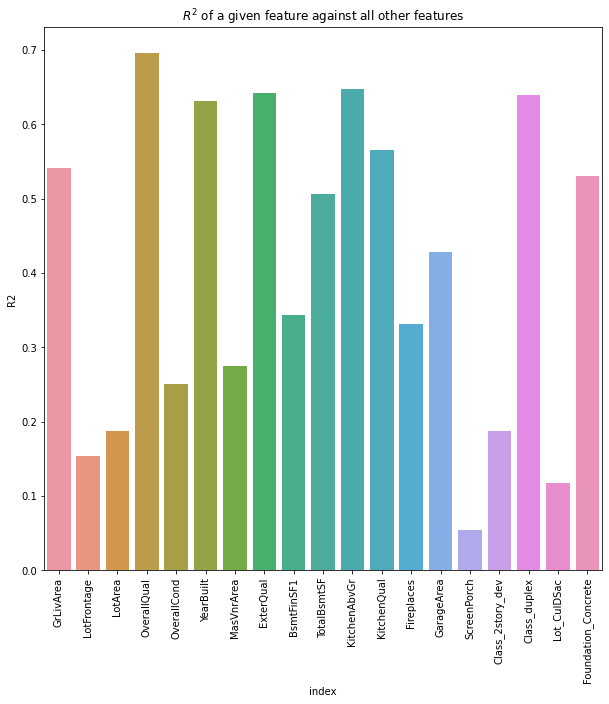

In [20]:
# R^2 of each feature against all others 
from sklearn.linear_model import LinearRegression

continuous_features = ['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
                       'YearBuilt', 'MasVnrArea','ExterQual', 'BsmtFinSF1', 'TotalBsmtSF',
                       'KitchenAbvGr', 'KitchenQual','Fireplaces', 'GarageArea', 
                       'ScreenPorch','Class_2story_dev', 'Class_duplex','Lot_CulDSac', 
                       'Foundation_Concrete']
housing_subset = housing[continuous_features]
scores = {}
ols2 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                df2     = housing_subset.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df2, feature)
                scores[feature_name] = ols2.score(df2, feature)   
plt.figure(figsize=(10,10))
p = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.setp(p.get_xticklabels(), rotation=90)
plt.title('$R^2$ of a given feature against all other features')

### Comparing the VIF from the selected to features to all features

Text(0.5, 1.0, '$R^2$ of a given feature against all other features')

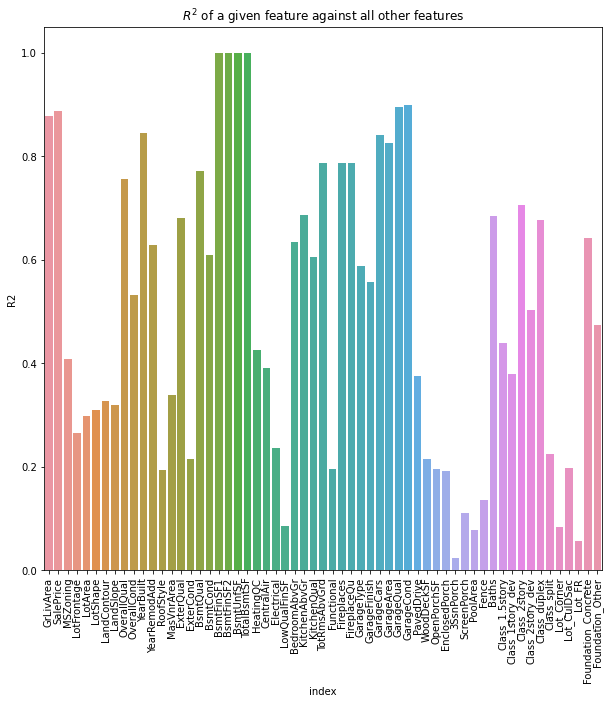

In [21]:
#Multicolinearity of all features; 

continuous_features = housing.columns
scores = {}
ols2 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                df2     = housing.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df2, feature)
                scores[feature_name] = ols2.score(df2, feature)   
plt.figure(figsize=(10,10))
p = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.setp(p.get_xticklabels(), rotation=90)
plt.title('$R^2$ of a given feature against all other features')

### Dropping OverallQual since it has the highest VIF

Text(0.5, 1.0, '$R^2$ of a given feature against all other features')

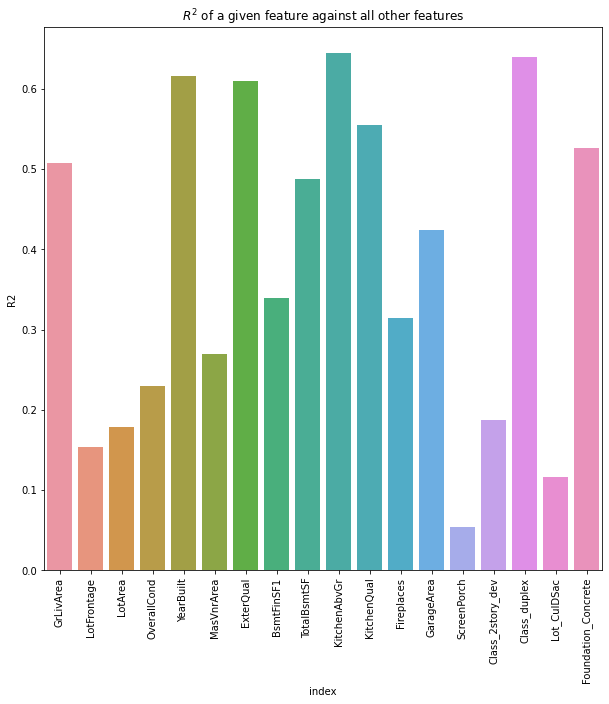

In [22]:
# R^2 of each feature against all others 
from sklearn.linear_model import LinearRegression

continuous_features = ['GrLivArea', 'LotFrontage', 'LotArea', 'OverallCond','YearBuilt', 
                       'MasVnrArea','ExterQual', 'BsmtFinSF1', 'TotalBsmtSF','KitchenAbvGr', 
                       'KitchenQual','Fireplaces', 'GarageArea', 'ScreenPorch','Class_2story_dev', 
                       'Class_duplex','Lot_CulDSac', 'Foundation_Concrete']
housing_subset = housing[continuous_features]
scores = {}
ols2 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                df2     = housing_subset.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df2, feature)
                scores[feature_name] = ols2.score(df2, feature)   
plt.figure(figsize=(10,10))
p = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.setp(p.get_xticklabels(), rotation=90)
plt.title('$R^2$ of a given feature against all other features')

###  Dropping Class_duplex

Text(0.5, 1.0, '$R^2$ of a given feature against all other features')

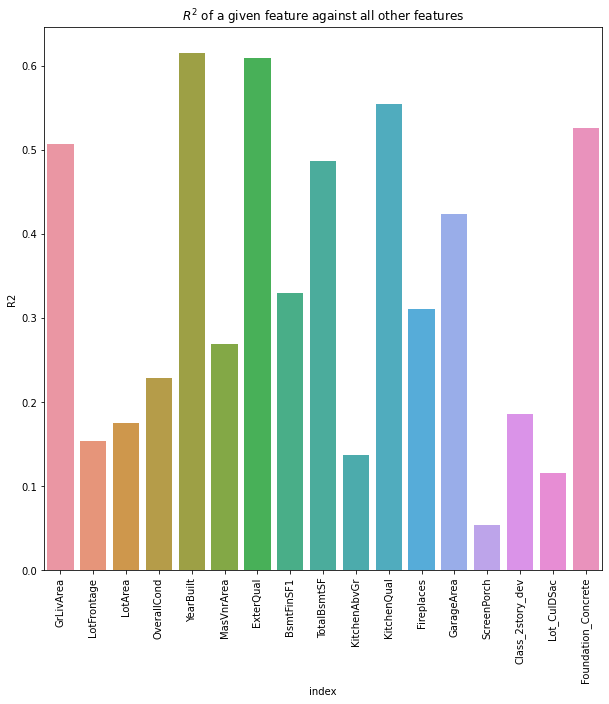

In [23]:
# R^2 of each feature against all others 
from sklearn.linear_model import LinearRegression

continuous_features = ['GrLivArea', 'LotFrontage', 'LotArea', 'OverallCond','YearBuilt', 
                       'MasVnrArea','ExterQual', 'BsmtFinSF1', 'TotalBsmtSF','KitchenAbvGr',
                       'KitchenQual','Fireplaces', 'GarageArea', 'ScreenPorch','Class_2story_dev', 
                       'Lot_CulDSac', 'Foundation_Concrete']
housing_subset = housing[continuous_features]
scores = {}
ols2 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                df2     = housing_subset.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df2, feature)
                scores[feature_name] = ols2.score(df2, feature)   
plt.figure(figsize=(10,10))
p = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.setp(p.get_xticklabels(), rotation=90)
plt.title('$R^2$ of a given feature against all other features')

### All R^2 of a single feature

In [24]:
import statsmodels.api as sm 

r2 = []

for feature in housing.columns:
    X=housing[[feature]]
    y=housing.SalePrice

    X_add_const = sm.add_constant(X)
    ols = sm.OLS(y, X_add_const)
    ans = ols.fit()
    r2.append(ans.rsquared)

single_feature_r2=pd.Series(r2,index=housing.columns).sort_values(ascending=False)
single_feature_r2

SalePrice              1.000000e+00
OverallQual            6.248925e-01
GrLivArea              5.183732e-01
ExterQual              4.657655e-01
KitchenQual            4.291792e-01
TotalBsmtSF            4.257489e-01
Baths                  4.095842e-01
GarageCars             4.075858e-01
GarageArea             4.028044e-01
BsmtQual               3.453958e-01
YearBuilt              2.963387e-01
GarageFinish           2.847573e-01
FireplaceQu            2.779524e-01
YearRemodAdd           2.645135e-01
Foundation_Concrete    2.578062e-01
MasVnrArea             2.484343e-01
TotRmsAbvGrd           2.403151e-01
Fireplaces             2.383233e-01
BsmtFinSF1             2.125857e-01
HeatingQC              1.899650e-01
GarageType             1.467969e-01
WoodDeckSF             1.110433e-01
OpenPorchSF            9.396688e-02
LotShape               9.231825e-02
Class_2story           8.937462e-02
LotArea                7.531921e-02
GarageQual             7.464954e-02
PavedDrive             7.036

### Subsetting on just the features with more than R2 of >= 0.10

In [25]:
feature_subset = single_feature_r2[1:22]
feature_subset

OverallQual            0.624893
GrLivArea              0.518373
ExterQual              0.465766
KitchenQual            0.429179
TotalBsmtSF            0.425749
Baths                  0.409584
GarageCars             0.407586
GarageArea             0.402804
BsmtQual               0.345396
YearBuilt              0.296339
GarageFinish           0.284757
FireplaceQu            0.277952
YearRemodAdd           0.264514
Foundation_Concrete    0.257806
MasVnrArea             0.248434
TotRmsAbvGrd           0.240315
Fireplaces             0.238323
BsmtFinSF1             0.212586
HeatingQC              0.189965
GarageType             0.146797
WoodDeckSF             0.111043
dtype: float64

### R^2 of all five feature combinations

Five features is where we start to max out computationally. From here we need to proceed by adding single features to sets of five, but we also need to check sets that don't have high multicolinearity already.

In [26]:
import statsmodels.api as sm 
import itertools

r2 = []
combos=list(itertools.combinations(feature_subset.index,5))

for feature in combos:
    X=housing[[feature[0],feature[1],feature[2],feature[3],feature[4]]]
    y=housing.SalePrice

    X_add_const = sm.add_constant(X)
    ols = sm.OLS(y, X_add_const)
    ans = ols.fit()
    r2.append(ans.rsquared)

five_feature_r2=pd.Series(r2,index=combos).sort_values(ascending=False)
five_feature_r2

(OverallQual, GrLivArea, ExterQual, TotalBsmtSF, BsmtFinSF1)                    0.832777
(OverallQual, GrLivArea, ExterQual, GarageArea, BsmtFinSF1)                     0.831518
(OverallQual, GrLivArea, KitchenQual, TotalBsmtSF, BsmtFinSF1)                  0.830983
(OverallQual, GrLivArea, KitchenQual, GarageArea, BsmtFinSF1)                   0.828960
(OverallQual, GrLivArea, ExterQual, GarageCars, BsmtFinSF1)                     0.828467
(OverallQual, GrLivArea, ExterQual, KitchenQual, BsmtFinSF1)                    0.826544
(OverallQual, GrLivArea, TotalBsmtSF, GarageArea, BsmtFinSF1)                   0.826189
(OverallQual, GrLivArea, ExterQual, MasVnrArea, BsmtFinSF1)                     0.825997
(OverallQual, GrLivArea, KitchenQual, GarageCars, BsmtFinSF1)                   0.825836
(OverallQual, GrLivArea, ExterQual, YearBuilt, BsmtFinSF1)                      0.825684
(OverallQual, GrLivArea, TotalBsmtSF, YearBuilt, BsmtFinSF1)                    0.825043
(OverallQual, GrLivAr

Now the task is to add more features onto the base of these five and see how much the R^2 can improve, and then we select additional features while trying to maximize R^2 and minimize multicolinearity. Computationally, we try adding an additional three out of everything not selected.

In [27]:
#Just look at multicolinearity in features that have a R^2 above 0.80
combos = five_feature_r2.index[:274]
results = {}
for feature in combos:
    X=housing[[feature[0],feature[1],feature[2],feature[3],feature[4]]]
    subset_features = X.columns
    scores = []
    lin = LinearRegression()
    for subset_feature in subset_features:
                    df = X.copy()
                    feature2 = df[subset_feature].copy()
                    df.drop(subset_feature, axis=1, inplace=True)
                    lin.fit(df, feature2)
                    scores.append(lin.score(df, feature2))
    results[feature]=scores
results

{('OverallQual',
  'GrLivArea',
  'ExterQual',
  'TotalBsmtSF',
  'BsmtFinSF1'): [0.6195050832163669, 0.33466691156107, 0.5167081915627483, 0.44908762020297777, 0.26636446734106123],
 ('OverallQual',
  'GrLivArea',
  'ExterQual',
  'GarageArea',
  'BsmtFinSF1'): [0.6155070453495688, 0.3572037538434064, 0.5217580226552763, 0.3709060610203828, 0.10860425697449383],
 ('OverallQual',
  'GrLivArea',
  'KitchenQual',
  'TotalBsmtSF',
  'BsmtFinSF1'): [0.5683012808676631, 0.33817095877448267, 0.4374142508364425, 0.4449319685959403, 0.2684485448554862],
 ('OverallQual',
  'GrLivArea',
  'KitchenQual',
  'GarageArea',
  'BsmtFinSF1'): [0.560484464012295, 0.35879077356991906, 0.4443664358063697, 0.3673832731594493, 0.11159003976782378],
 ('OverallQual',
  'GrLivArea',
  'ExterQual',
  'GarageCars',
  'BsmtFinSF1'): [0.6251363990342916, 0.3565947985785869, 0.5211381749220614, 0.40140810933120835, 0.09233078472891476],
 ('OverallQual',
  'GrLivArea',
  'ExterQual',
  'KitchenQual',
  'BsmtFinSF1')

In [28]:
pd.Series(results).apply(lambda x: max(x)).sort_values().values[:20]
idxs = list(pd.Series(results).apply(lambda x: max(x)).sort_values().index[:20])
five_feature_r2[idxs]

(GrLivArea, ExterQual, GarageArea, FireplaceQu, BsmtFinSF1)      0.801676
(GrLivArea, ExterQual, GarageArea, Fireplaces, BsmtFinSF1)       0.800469
(OverallQual, GrLivArea, MasVnrArea, BsmtFinSF1, WoodDeckSF)     0.809237
(OverallQual, GrLivArea, Fireplaces, BsmtFinSF1, WoodDeckSF)     0.804119
(OverallQual, GrLivArea, FireplaceQu, BsmtFinSF1, WoodDeckSF)    0.805255
(GrLivArea, ExterQual, GarageArea, BsmtQual, BsmtFinSF1)         0.805612
(GrLivArea, ExterQual, GarageCars, BsmtQual, BsmtFinSF1)         0.802678
(OverallQual, GrLivArea, MasVnrArea, Fireplaces, BsmtFinSF1)     0.808196
(OverallQual, GrLivArea, FireplaceQu, MasVnrArea, BsmtFinSF1)    0.809241
(OverallQual, GrLivArea, BsmtFinSF1, GarageType, WoodDeckSF)     0.803767
(OverallQual, GrLivArea, Fireplaces, BsmtFinSF1, GarageType)     0.802750
(GrLivArea, KitchenQual, TotalBsmtSF, YearBuilt, BsmtFinSF1)     0.802905
(GrLivArea, ExterQual, TotalBsmtSF, BsmtFinSF1, HeatingQC)       0.800891
(GrLivArea, ExterQual, TotalBsmtSF, Ga

### OverallQual, GrLivArea, GarageArea, BsmtFinSF1, WoodDeckSF look good

From this (OverallQual, GrLivArea, GarageArea, BsmtFinSF1, WoodDeckSF) look good. Larger R^2 (.816999) but still on the lower-end of multicolinearity (.42404757 maximum)

In [29]:
import statsmodels.api as sm 
import itertools

r2=[]
selected_features = ['OverallQual', 'GrLivArea', 'GarageArea', 'BsmtFinSF1', 'WoodDeckSF']
remaining_features = housing.columns.drop(selected_features)
remaining_features = remaining_features.drop('SalePrice')
combos=list(itertools.combinations(remaining_features,4))

for feature in combos:
    subset = selected_features.copy()
    [subset.append(i) for i in feature]
    X=housing[subset]
    y=housing.SalePrice

    X_add_const = sm.add_constant(X)
    ols = sm.OLS(y, X_add_const)
    ans = ols.fit()
    r2.append(ans.rsquared)

nine_feature_r2=pd.Series(r2,index=combos).sort_values(ascending=False)
nine_feature_r2

KeyboardInterrupt: 

In [ ]:
#Just look at multicolinearity in features that have a R^2 above 0.845
combos = nine_feature_r2.index[:1280]
results = {}
selected_features = ['OverallQual', 'GrLivArea', 'GarageArea', 'BsmtFinSF1', 'WoodDeckSF']
for feature in combos:
    subset = selected_features.copy()
    [subset.append(i) for i in feature]
    X=housing[subset]
    subset_features = X.columns
    scores = []
    lin = LinearRegression()
    for subset_feature in subset_features:
                    df = X.copy()
                    feature2 = df[subset_feature].copy()
                    df.drop(subset_feature, axis=1, inplace=True)
                    lin.fit(df, feature2)
                    scores.append(lin.score(df, feature2))
    results[feature]=scores
results

In [ ]:
pd.Series(results).apply(lambda x: max(x)).sort_values().values[:200]
idxs = list(pd.Series(results).apply(lambda x: max(x)).sort_values().index[:200])
nine_feature_r2[idxs]

In [ ]:
import statsmodels.api as sm 

X=housing[['OverallQual', 'GrLivArea', 'GarageArea', 'BsmtFinSF1','WoodDeckSF',
          'LotArea','MasVnrArea','KitchenQual','TotalBsmtSF']]
y=housing.SalePrice

X_add_const = sm.add_constant(X)
ols = sm.OLS(y, X_add_const)
ans = ols.fit()
print(ans.summary())
print(ans.rsquared)

MSZoning, MasVnrArea, TotalBsmtSF, KitchenQual 0.848529
MasVnrArea, TotalBsmtSF, KitchenQual, Class_2story_dev 0.848319
LotArea, TotalBsmtSF, HeatingQC, KitchenQual 0.849057
LotArea, TotalBsmtSF, KitchenQual, Class_duplex 0.849369
LotArea, MasVnrArea, TotalBsmtSF, KitchenQual 0.850750

In [164]:
test = nine_feature_r2[idxs]
test[test>=.85]

(LotArea, MasVnrArea, TotalBsmtSF, KitchenQual)    0.85075
dtype: float64

In [194]:
import statsmodels.api as sm 

X=housing[['OverallQual', 'GrLivArea', 'GarageArea', 'BsmtFinSF1','WoodDeckSF',
          'LotArea','MasVnrArea','KitchenQual','TotalBsmtSF']]
y=housing.SalePrice

X_add_const = sm.add_constant(X)
ols = sm.OLS(y, X_add_const)
ans = ols.fit()
print(ans.summary())
print(ans.rsquared)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1628.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:48:18   Log-Likelihood:                -30169.
No. Observations:                2580   AIC:                         6.036e+04
Df Residuals:                    2570   BIC:                         6.042e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.219e+05   3439.023    -35.459      

### Adding in upgradable features to model, estimating coefficients.

In [314]:
core_features=['GrLivArea', 'GarageArea', 'BsmtFinSF1','WoodDeckSF',
          'LotArea','MasVnrArea','KitchenQual','TotalBsmtSF',
          'ScreenPorch','LotFrontage','OverallCond','Fireplaces',
               'YearBuilt']

test_features=['OverallQual', 'YearRemodAdd', 'RoofStyle', 'ExterQual',
               'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF2','BsmtUnfSF', 
               'HeatingQC', 'CentralAir','Electrical','FireplaceQu','PavedDrive',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','PoolArea', 'Fence', 'Baths',]
results=pd.DataFrame()
for test in test_features:
    subset = core_features.copy()
    subset.append(test)
    X=housing[subset]
    y=housing.SalePrice
    X_add_const = sm.add_constant(X)
    ols = sm.OLS(y, X_add_const)
    ans = ols.fit()
    #print(ans.summary())
    print(ans.rsquared)
    results= pd.concat([results,ans.params],axis=1)
results

0.8627110509146442
0.8414388757417595
0.8403549820806143
0.85379957251528
0.8397473672725395
0.8425307457702981
0.8401952387505917
0.8398350237381876
0.8398350237381875
0.8424345720643098
0.8406786479330353
0.8402058860865338
0.8412439296945862
0.8406980198626995
0.8397888087228272
0.8400458997609743
0.8397355877315021
0.8399485197510087
0.8402500623180231
0.8397218123084507


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
const,-744282.536442,-1.374234e+06,-1.122943e+06,-903228.496303,-1.106646e+06,-962494.572990,-1.119949e+06,-1.108470e+06,-1.108470e+06,-1.019466e+06,-1.182591e+06,-1.156640e+06,-1.099126e+06,-1.198052e+06,-1.104907e+06,-1.152802e+06,-1.108098e+06,-1.107652e+06,-1.092791e+06,-1.109582e+06
GrLivArea,46.151608,5.390010e+01,5.553663e+01,52.644549,5.527065e+01,54.557523,5.498475e+01,5.548594e+01,5.548594e+01,5.409125e+01,5.510708e+01,5.533206e+01,5.467470e+01,5.532866e+01,5.490617e+01,5.510688e+01,5.526856e+01,5.532078e+01,5.498860e+01,5.532001e+01
GarageArea,29.165108,3.722030e+01,3.686878e+01,32.583333,3.707034e+01,37.561231,3.657265e+01,3.692628e+01,3.692628e+01,3.678545e+01,3.815263e+01,3.744397e+01,3.626373e+01,3.772266e+01,3.690321e+01,3.665431e+01,3.693331e+01,3.691173e+01,3.694097e+01,3.695520e+01
BsmtFinSF1,23.036511,2.062281e+01,1.984003e+01,21.925381,2.015966e+01,19.968038,1.992276e+01,2.051563e+01,1.576899e+01,2.086834e+01,2.004488e+01,2.022982e+01,2.116722e+01,2.051764e+01,2.012272e+01,2.017124e+01,2.010843e+01,2.015022e+01,2.041118e+01,2.017128e+01
WoodDeckSF,15.948219,1.394013e+01,1.456873e+01,16.183600,1.465144e+01,12.521569,1.517265e+01,1.390131e+01,1.390131e+01,1.565077e+01,1.455946e+01,1.514957e+01,1.418478e+01,1.438240e+01,1.508322e+01,1.544537e+01,1.473169e+01,1.534749e+01,1.612756e+01,1.466694e+01
LotArea,0.655584,4.854778e-01,4.681026e-01,0.553994,4.771371e-01,0.521866,4.622637e-01,4.700265e-01,4.700265e-01,4.946520e-01,4.810527e-01,4.780252e-01,5.117016e-01,4.607708e-01,4.761814e-01,4.777997e-01,4.764013e-01,4.798502e-01,4.703045e-01,4.768621e-01
MasVnrArea,31.481135,4.038500e+01,3.666700e+01,34.843254,3.871936e+01,39.482808,3.826195e+01,3.871734e+01,3.871734e+01,3.958719e+01,3.848749e+01,3.855171e+01,3.809637e+01,3.872177e+01,3.887594e+01,3.898351e+01,3.867898e+01,3.844776e+01,3.843773e+01,3.866525e+01
KitchenQual,15634.978112,2.170125e+04,2.397621e+04,14294.128130,2.408282e+04,23002.771172,2.400479e+04,2.415832e+04,2.415832e+04,2.188432e+04,2.376118e+04,2.400159e+04,2.326143e+04,2.345979e+04,2.395940e+04,2.391964e+04,2.406909e+04,2.406650e+04,2.388471e+04,2.406483e+04
TotalBsmtSF,21.369477,2.949893e+01,2.846484e+01,25.596074,2.931239e+01,24.369800,3.151958e+01,2.888570e+01,3.363234e+01,2.909242e+01,2.979282e+01,2.939686e+01,2.888740e+01,2.962647e+01,2.926481e+01,2.919520e+01,2.934059e+01,2.922571e+01,2.917991e+01,2.934433e+01
ScreenPorch,37.799107,3.736192e+01,3.150807e+01,40.851275,3.421340e+01,35.182027,3.331501e+01,3.324905e+01,3.324905e+01,3.735308e+01,3.590759e+01,3.393072e+01,3.581661e+01,3.607036e+01,3.409379e+01,3.693279e+01,3.436624e+01,3.486211e+01,3.573080e+01,3.415630e+01


In [318]:
results.iloc[14:].index

Index(['OverallQual', 'YearRemodAdd', 'RoofStyle', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC',
       'CentralAir', 'Electrical', 'FireplaceQu', 'PavedDrive', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'PoolArea', 'Fence', 'Baths'],
      dtype='object')

In [310]:
coefs = results.iloc[:14]
coefs['median']=coefs.apply(lambda x: x.median(),axis=1)
coefs['stdev']=coefs.apply(lambda x: x.std(),axis=1)
coefs

/Users/Matt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Matt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,median,stdev
const,-744282.536442,-1.374234e+06,-1.122943e+06,-903228.496303,-1.106646e+06,-962494.572990,-1.119949e+06,-1.108470e+06,-1.108470e+06,-1.019466e+06,-1.182591e+06,-1.156640e+06,-1.099126e+06,-1.198052e+06,-1.104907e+06,-1.152802e+06,-1.108098e+06,-1.107652e+06,-1.092791e+06,-1.109582e+06,-1.108284e+06,120247.261993
GrLivArea,46.151608,5.390010e+01,5.553663e+01,52.644549,5.527065e+01,54.557523,5.498475e+01,5.548594e+01,5.548594e+01,5.409125e+01,5.510708e+01,5.533206e+01,5.467470e+01,5.532866e+01,5.490617e+01,5.510688e+01,5.526856e+01,5.532078e+01,5.498860e+01,5.532001e+01,5.510698e+01,2.029424
GarageArea,29.165108,3.722030e+01,3.686878e+01,32.583333,3.707034e+01,37.561231,3.657265e+01,3.692628e+01,3.692628e+01,3.678545e+01,3.815263e+01,3.744397e+01,3.626373e+01,3.772266e+01,3.690321e+01,3.665431e+01,3.693331e+01,3.691173e+01,3.694097e+01,3.695520e+01,3.692628e+01,1.974192
BsmtFinSF1,23.036511,2.062281e+01,1.984003e+01,21.925381,2.015966e+01,19.968038,1.992276e+01,2.051563e+01,1.576899e+01,2.086834e+01,2.004488e+01,2.022982e+01,2.116722e+01,2.051764e+01,2.012272e+01,2.017124e+01,2.010843e+01,2.015022e+01,2.041118e+01,2.017128e+01,2.017126e+01,1.277344
WoodDeckSF,15.948219,1.394013e+01,1.456873e+01,16.183600,1.465144e+01,12.521569,1.517265e+01,1.390131e+01,1.390131e+01,1.565077e+01,1.455946e+01,1.514957e+01,1.418478e+01,1.438240e+01,1.508322e+01,1.544537e+01,1.473169e+01,1.534749e+01,1.612756e+01,1.466694e+01,1.469931e+01,0.867214
LotArea,0.655584,4.854778e-01,4.681026e-01,0.553994,4.771371e-01,0.521866,4.622637e-01,4.700265e-01,4.700265e-01,4.946520e-01,4.810527e-01,4.780252e-01,5.117016e-01,4.607708e-01,4.761814e-01,4.777997e-01,4.764013e-01,4.798502e-01,4.703045e-01,4.768621e-01,4.774684e-01,0.043369
MasVnrArea,31.481135,4.038500e+01,3.666700e+01,34.843254,3.871936e+01,39.482808,3.826195e+01,3.871734e+01,3.871734e+01,3.958719e+01,3.848749e+01,3.855171e+01,3.809637e+01,3.872177e+01,3.887594e+01,3.898351e+01,3.867898e+01,3.844776e+01,3.843773e+01,3.866525e+01,3.867211e+01,1.873982
KitchenQual,15634.978112,2.170125e+04,2.397621e+04,14294.128130,2.408282e+04,23002.771172,2.400479e+04,2.415832e+04,2.415832e+04,2.188432e+04,2.376118e+04,2.400159e+04,2.326143e+04,2.345979e+04,2.395940e+04,2.391964e+04,2.406909e+04,2.406650e+04,2.388471e+04,2.406483e+04,2.393952e+04,2709.584408
TotalBsmtSF,21.369477,2.949893e+01,2.846484e+01,25.596074,2.931239e+01,24.369800,3.151958e+01,2.888570e+01,3.363234e+01,2.909242e+01,2.979282e+01,2.939686e+01,2.888740e+01,2.962647e+01,2.926481e+01,2.919520e+01,2.934059e+01,2.922571e+01,2.917991e+01,2.934433e+01,2.924526e+01,2.452658
ScreenPorch,37.799107,3.736192e+01,3.150807e+01,40.851275,3.421340e+01,35.182027,3.331501e+01,3.324905e+01,3.324905e+01,3.735308e+01,3.590759e+01,3.393072e+01,3.581661e+01,3.607036e+01,3.409379e+01,3.693279e+01,3.436624e+01,3.486211e+01,3.573080e+01,3.415630e+01,3.502207e+01,2.040955


In [305]:
core_features=['GrLivArea', 'GarageArea', 'BsmtFinSF1','WoodDeckSF',
          'LotArea','MasVnrArea','KitchenQual','TotalBsmtSF',
          'ScreenPorch','LotFrontage','OverallCond','Fireplaces',
               'YearBuilt']

test_features=['OverallQual', 'YearRemodAdd', 'RoofStyle', 'ExterQual',
               'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF2','BsmtUnfSF', 
               'HeatingQC', 'CentralAir','Electrical','FireplaceQu','PavedDrive',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','PoolArea', 'Fence', 'Baths',]
results=pd.DataFrame()
for test in test_features:
    subset = core_features.copy()
    subset.append(test)
    X=housing[subset]
    y=housing.SalePrice
    X_add_const = sm.add_constant(X)
    ols = sm.OLS(y, X_add_const)
    ans = ols.fit()
    #print(ans.summary())
    print(ans.rsquared)
    results= pd.concat([results,ans.bse],axis=1)
results

0.8627110509146442
0.8414388757417595
0.8403549820806143
0.85379957251528
0.8397473672725395
0.8425307457702981
0.8401952387505917
0.8398350237381876
0.8398350237381875
0.8424345720643098
0.8406786479330353
0.8402058860865338
0.8412439296945862
0.8406980198626995
0.8397888087228272
0.8400458997609743
0.8397355877315021
0.8399485197510087
0.8402500623180231
0.8397218123084507


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
const,53804.209579,74361.585361,55026.019243,54078.782230,55015.070843,58582.179474,55023.831996,54927.550307,54927.550307,56101.603602,57946.878737,57521.483172,54717.792878,59256.931596,55042.061448,58234.470154,54949.878370,54909.711684,55119.382315,59206.800745
GrLivArea,1.578571,1.649792,1.637034,1.573365,1.637966,1.627050,1.638860,1.645565,1.645565,1.633768,1.633695,1.635778,1.634654,1.633164,1.674257,1.637930,1.638019,1.637172,1.638170,1.942432
GarageArea,3.484130,3.722795,3.735271,3.585253,3.746311,3.710694,3.739655,3.741320,3.741320,3.710849,3.743754,3.740960,3.727386,3.736122,3.742165,3.741161,3.742789,3.739998,3.736397,3.743187
BsmtFinSF1,1.565165,1.677884,1.683512,1.612718,1.684753,1.669700,1.683574,1.707618,3.649756,1.673702,1.679460,1.682166,1.689270,1.682020,1.684021,1.682731,1.685033,1.683182,1.684293,1.849717
WoodDeckSF,4.607641,4.953158,4.968269,4.755391,4.977644,4.944291,4.974229,5.007594,5.007594,4.938006,4.963216,4.973683,4.955251,4.963331,4.994123,4.985075,4.980490,4.987766,4.995484,4.983786
LotArea,0.073071,0.077997,0.078293,0.075039,0.078396,0.077996,0.078462,0.078533,0.078533,0.077781,0.078174,0.078283,0.078344,0.078266,0.078386,0.078322,0.078401,0.078361,0.078303,0.078413
MasVnrArea,3.601579,3.866102,3.916761,3.707353,3.873539,3.841074,3.870550,3.872063,3.872063,3.842839,3.862052,3.867738,3.856676,3.861526,3.877192,3.871717,3.873158,3.872476,3.867820,3.882067
KitchenQual,1190.599769,1283.371551,1206.968562,1311.423610,1209.319857,1208.625249,1207.449527,1210.660234,1210.660234,1242.819329,1207.894116,1207.425778,1214.117374,1214.944182,1212.969955,1209.474938,1209.050245,1208.193150,1208.616146,1209.260353
TotalBsmtSF,1.820883,1.912743,1.939293,1.852007,1.923913,2.043517,2.074239,1.953600,3.710495,1.906947,1.920360,1.920028,1.916054,1.918228,1.924476,1.922223,1.923064,1.922728,1.920655,1.935948
ScreenPorch,9.959044,10.718365,10.769858,10.284400,10.758382,10.665315,10.747435,10.776471,10.776471,10.678306,10.735993,10.743005,10.712929,10.736920,10.756897,10.816521,10.767154,10.757596,10.754690,10.759560


In [306]:
standard_errors = results.iloc[:14]
standard_errors['median']=standard_errors.apply(lambda x: x.median(),axis=1)
standard_errors['std']=standard_errors.apply(lambda x: x.std(),axis=1)
standard_errors

/Users/Matt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Matt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,median,std
const,53804.209579,74361.585361,55026.019243,54078.782230,55015.070843,58582.179474,55023.831996,54927.550307,54927.550307,56101.603602,57946.878737,57521.483172,54717.792878,59256.931596,55042.061448,58234.470154,54949.878370,54909.711684,55119.382315,59206.800745,55034.040345,4364.598209
GrLivArea,1.578571,1.649792,1.637034,1.573365,1.637966,1.627050,1.638860,1.645565,1.645565,1.633768,1.633695,1.635778,1.634654,1.633164,1.674257,1.637930,1.638019,1.637172,1.638170,1.942432,1.637551,0.070713
GarageArea,3.484130,3.722795,3.735271,3.585253,3.746311,3.710694,3.739655,3.741320,3.741320,3.710849,3.743754,3.740960,3.727386,3.736122,3.742165,3.741161,3.742789,3.739998,3.736397,3.743187,3.739827,0.063381
BsmtFinSF1,1.565165,1.677884,1.683512,1.612718,1.684753,1.669700,1.683574,1.707618,3.649756,1.673702,1.679460,1.682166,1.689270,1.682020,1.684021,1.682731,1.685033,1.683182,1.684293,1.849717,1.683347,0.432118
WoodDeckSF,4.607641,4.953158,4.968269,4.755391,4.977644,4.944291,4.974229,5.007594,5.007594,4.938006,4.963216,4.973683,4.955251,4.963331,4.994123,4.985075,4.980490,4.987766,4.995484,4.983786,4.973956,0.093186
LotArea,0.073071,0.077997,0.078293,0.075039,0.078396,0.077996,0.078462,0.078533,0.078533,0.077781,0.078174,0.078283,0.078344,0.078266,0.078386,0.078322,0.078401,0.078361,0.078303,0.078413,0.078313,0.001324
MasVnrArea,3.601579,3.866102,3.916761,3.707353,3.873539,3.841074,3.870550,3.872063,3.872063,3.842839,3.862052,3.867738,3.856676,3.861526,3.877192,3.871717,3.873158,3.872476,3.867820,3.882067,3.869185,0.068350
KitchenQual,1190.599769,1283.371551,1206.968562,1311.423610,1209.319857,1208.625249,1207.449527,1210.660234,1210.660234,1242.819329,1207.894116,1207.425778,1214.117374,1214.944182,1212.969955,1209.474938,1209.050245,1208.193150,1208.616146,1209.260353,1209.290105,27.941155
TotalBsmtSF,1.820883,1.912743,1.939293,1.852007,1.923913,2.043517,2.074239,1.953600,3.710495,1.906947,1.920360,1.920028,1.916054,1.918228,1.924476,1.922223,1.923064,1.922728,1.920655,1.935948,1.922475,0.392286
ScreenPorch,9.959044,10.718365,10.769858,10.284400,10.758382,10.665315,10.747435,10.776471,10.776471,10.678306,10.735993,10.743005,10.712929,10.736920,10.756897,10.816521,10.767154,10.757596,10.754690,10.759560,10.751063,0.197596
